In [42]:
import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install powerlaw
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8) #Set figure size here
import pickle
import powerlaw

# Occurrence Graph - Final

Graphs the final occurance data for SureChemBL patent data

In [4]:
#Load dictionary of SureChemBL cpd IDs : no. of occurances
d = pickle.load(open("Data\occurrence_dict_FINAL.p", "rb"))

In [9]:
#Turn values (occurances) into a list
occurrences = list(d.values())
occurrences.sort(reverse=True)
print(occurrences[0:10])

[1048679, 1024665, 1022359, 1004374, 999370, 971445, 968389, 926553, 925592, 873924]


Text(0, 0.5, 'Occurrences')

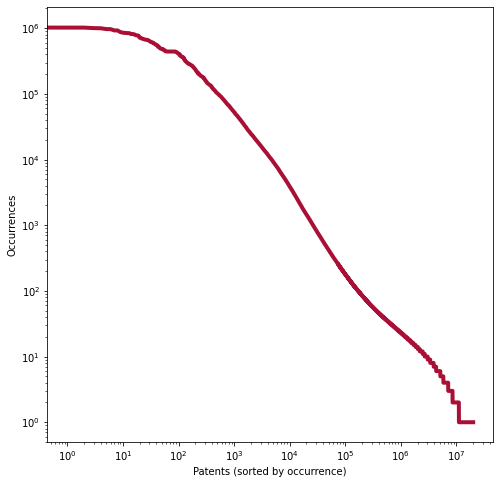

In [19]:
plt.figure(figsize=(8,8))
plt.loglog(occurrences, color="#aa0f35", linewidth=4)
plt.xlabel("Patents (sorted by occurrence)")
plt.ylabel("Occurrences")

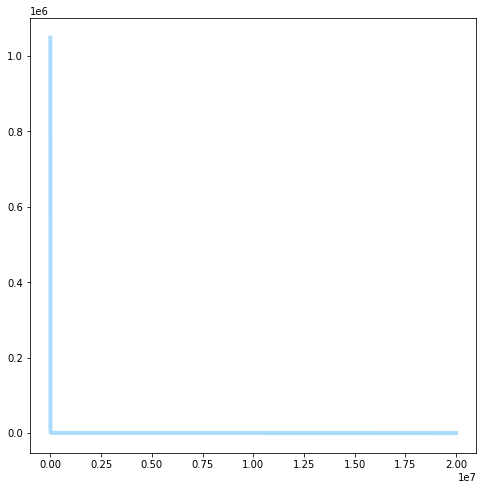

In [18]:
plt.figure(figsize=(8,8))
plt.plot(occurrences, color="#abdbfc", linewidth=4)
plt.xlabel("Patents (sorted by occurrence)")
plt.ylabel("Occurrences")

# Powerlaw tests & graphs

Test hypothesis (based on loglog plot) that occurrence data follows a powerlaw distribution (rich getting richer model)

In [22]:
#Following powerlaw code
fit = powerlaw.Fit(occurrences)

Calculating best minimal value for power law fit
C:\Users\John\miniconda3\envs\my-rdkit-env\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [71]:
#Powerlaw stats
print("PowerLaw Stats")
print("Alpha:", fit.power_law.alpha)
print("Sigma:", fit.power_law.sigma)
print()
print("Lognormal Stats")
print("Mu:", fit.lognormal.mu)
print("Sigma:", fit.lognormal.sigma)
print()
print("Comparison to lognormal:", fit.distribution_compare("power_law", "lognormal", normalized_ratio=True))

PowerLaw Stats
Alpha: 1.7700026129793258
Sigma: 0.00274331666498734

Lognormal Stats
Mu: -50.716460370939615
Sigma: 8.733715682656552

Comparison to lognormal: (-3.658520807429249, 0.0002536751484860232)


_**Note**_: lognormal distribution is slightly better at representing these data than powerlaw

Text(0.5, 1.0, 'PowerLaw Comparisons')

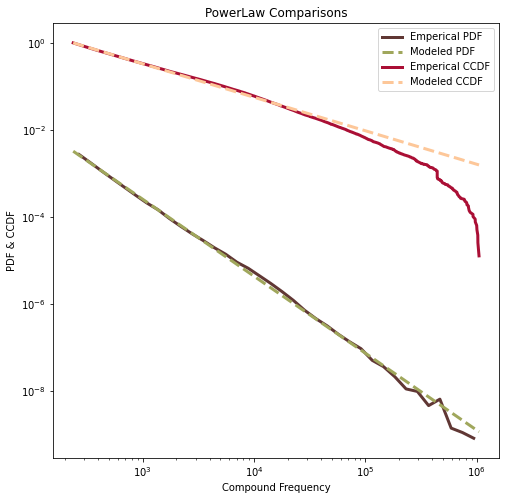

In [65]:
fig1 = fit.plot_pdf(color="#603734", linewidth=3, label="Emperical PDF") #Actual Data pdf (brown)
fit.power_law.plot_pdf(color="#a0a75c", linewidth=3, linestyle="--", ax=fig1, label="Modeled PDF") #Modeled pdf (green)

fit.plot_ccdf(color="#aa0f35", linewidth=3, ax=fig1, label="Emperical CCDF") #Actual data ccdf (red)
fit.power_law.plot_ccdf(color="#fdc799", linewidth=3, linestyle="--", ax=fig1, label="Modeled CCDF") #Modeled ccdf (tan)

plt.legend()
plt.xlabel("Compound Frequency")
plt.ylabel("PDF & CCDF")
plt.title("PowerLaw Comparisons")

Text(0.5, 1.0, 'PowerLaw vs Lognormal')

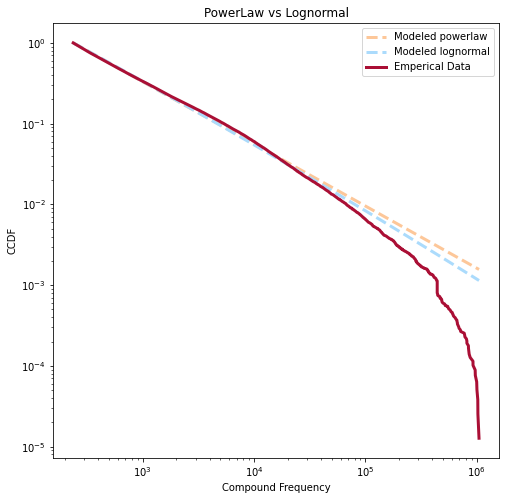

In [66]:
#Comparison to lognormal fit
fig2 = fit.power_law.plot_ccdf(color="#fdc799", linewidth=3, linestyle="--", label="Modeled powerlaw") #Modeled ccdf (tan)
fit.lognormal.plot_ccdf(color="#abdbfc", linewidth=3, linestyle="--", ax=fig2, label="Modeled lognormal")
fit.plot_ccdf(color="#aa0f35", linewidth=3,label="Emperical Data", ax=fig2)
#fit.exponential.plot_ccdf(color="#313a61", linewidth=3, linestyle="--", ax=fig2, label="Modeled lognormal")

plt.legend(loc="upper right")
plt.xlabel("Compound Frequency")
plt.ylabel("CCDF")
plt.title("PowerLaw vs Lognormal")